In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.transforms import ToTensor, ToPILImage
from PIL import Image
import matplotlib.pyplot as plt
import torchvision

Matplotlib is building the font cache; this may take a moment.


In [2]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        cnn_out1 = self.conv1(x)
        x = F.relu(cnn_out1)
        x = F.max_pool2d(x, 2)
        cnn_out2 = self.conv2(x)
        x = F.relu(cnn_out2)
        x = F.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x, (cnn_out1, cnn_out2)

In [3]:
image_path = "examples/bird_32_32.png"
image = Image.open(image_path)

In [4]:
input_tensor = ToTensor()(image)[:, :, :].unsqueeze(0).float()
input_tensor.shape

torch.Size([1, 4, 32, 32])

torch.Size([1, 1, 32, 32])
(32, 32)


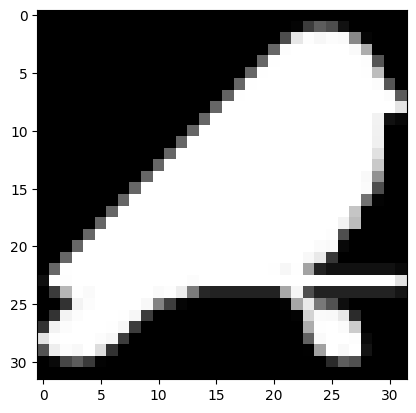

In [5]:
png_mask = input_tensor[:, 3, :, :].clone()
png_mask = png_mask.unsqueeze(1)
print(png_mask.shape)
image_from_png_mask = ToPILImage()(png_mask[0])
print(image_from_png_mask.size)
plt.imshow(image_from_png_mask, cmap='gray')

In [6]:
abs((png_mask) -1).shape

torch.Size([1, 1, 32, 32])

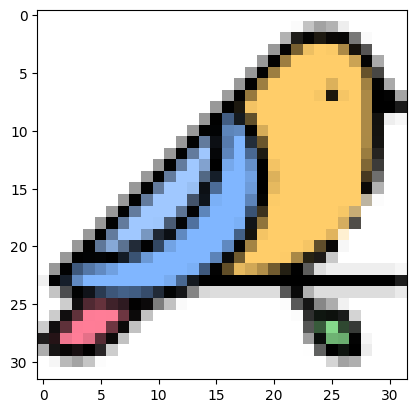

In [7]:
image_from_tensor = ToPILImage()(input_tensor.squeeze(0))
plt.imshow(image_from_tensor)

In [8]:
new_image = (input_tensor.clone() + abs((png_mask) -1))[:, :3, :, :]
new_image.shape

torch.Size([1, 3, 32, 32])

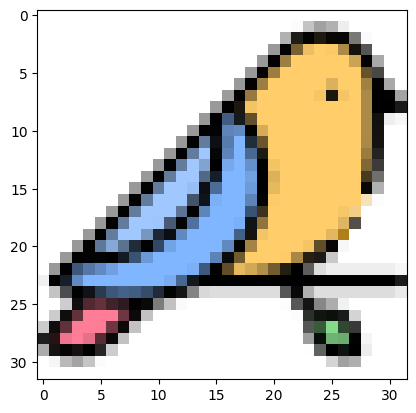

In [9]:
image_from_tensor = ToPILImage()(new_image.squeeze(0))
plt.imshow(image_from_tensor)

In [10]:
model = SimpleCNN()

In [11]:
model.eval()
with torch.no_grad():
    output, cnn_out = model(new_image)
    _, predicted = torch.max(output, 1)

In [12]:
output

tensor([[-0.0461, -0.0431, -0.0449, -0.0466,  0.0973,  0.0202, -0.0125, -0.0586,
          0.0597, -0.0125]])

In [13]:
cnn_out[1].shape

torch.Size([1, 32, 16, 16])

In [14]:
def plot_tensors(tensor, title=None):
    """"
    Plot a batch of images in a grid. Creates a grid of filters from a tensor.
    The input tensor should be of shape (batch_size, filters, height, width).
    """
    n = 4
    batch, filters, height, width = tensor.shape
    fig, axs = plt.subplots(filters // n, n, figsize=(n * width, (filters // n) * height))
    for i in range(filters):
        ax = axs[i // n, i % n]
        ax.imshow(tensor[0, i].cpu().numpy(), cmap='gray')
        ax.axis('off')

In [15]:
plot_tensors(cnn_out[0], title="First Convolutional Layer Output")

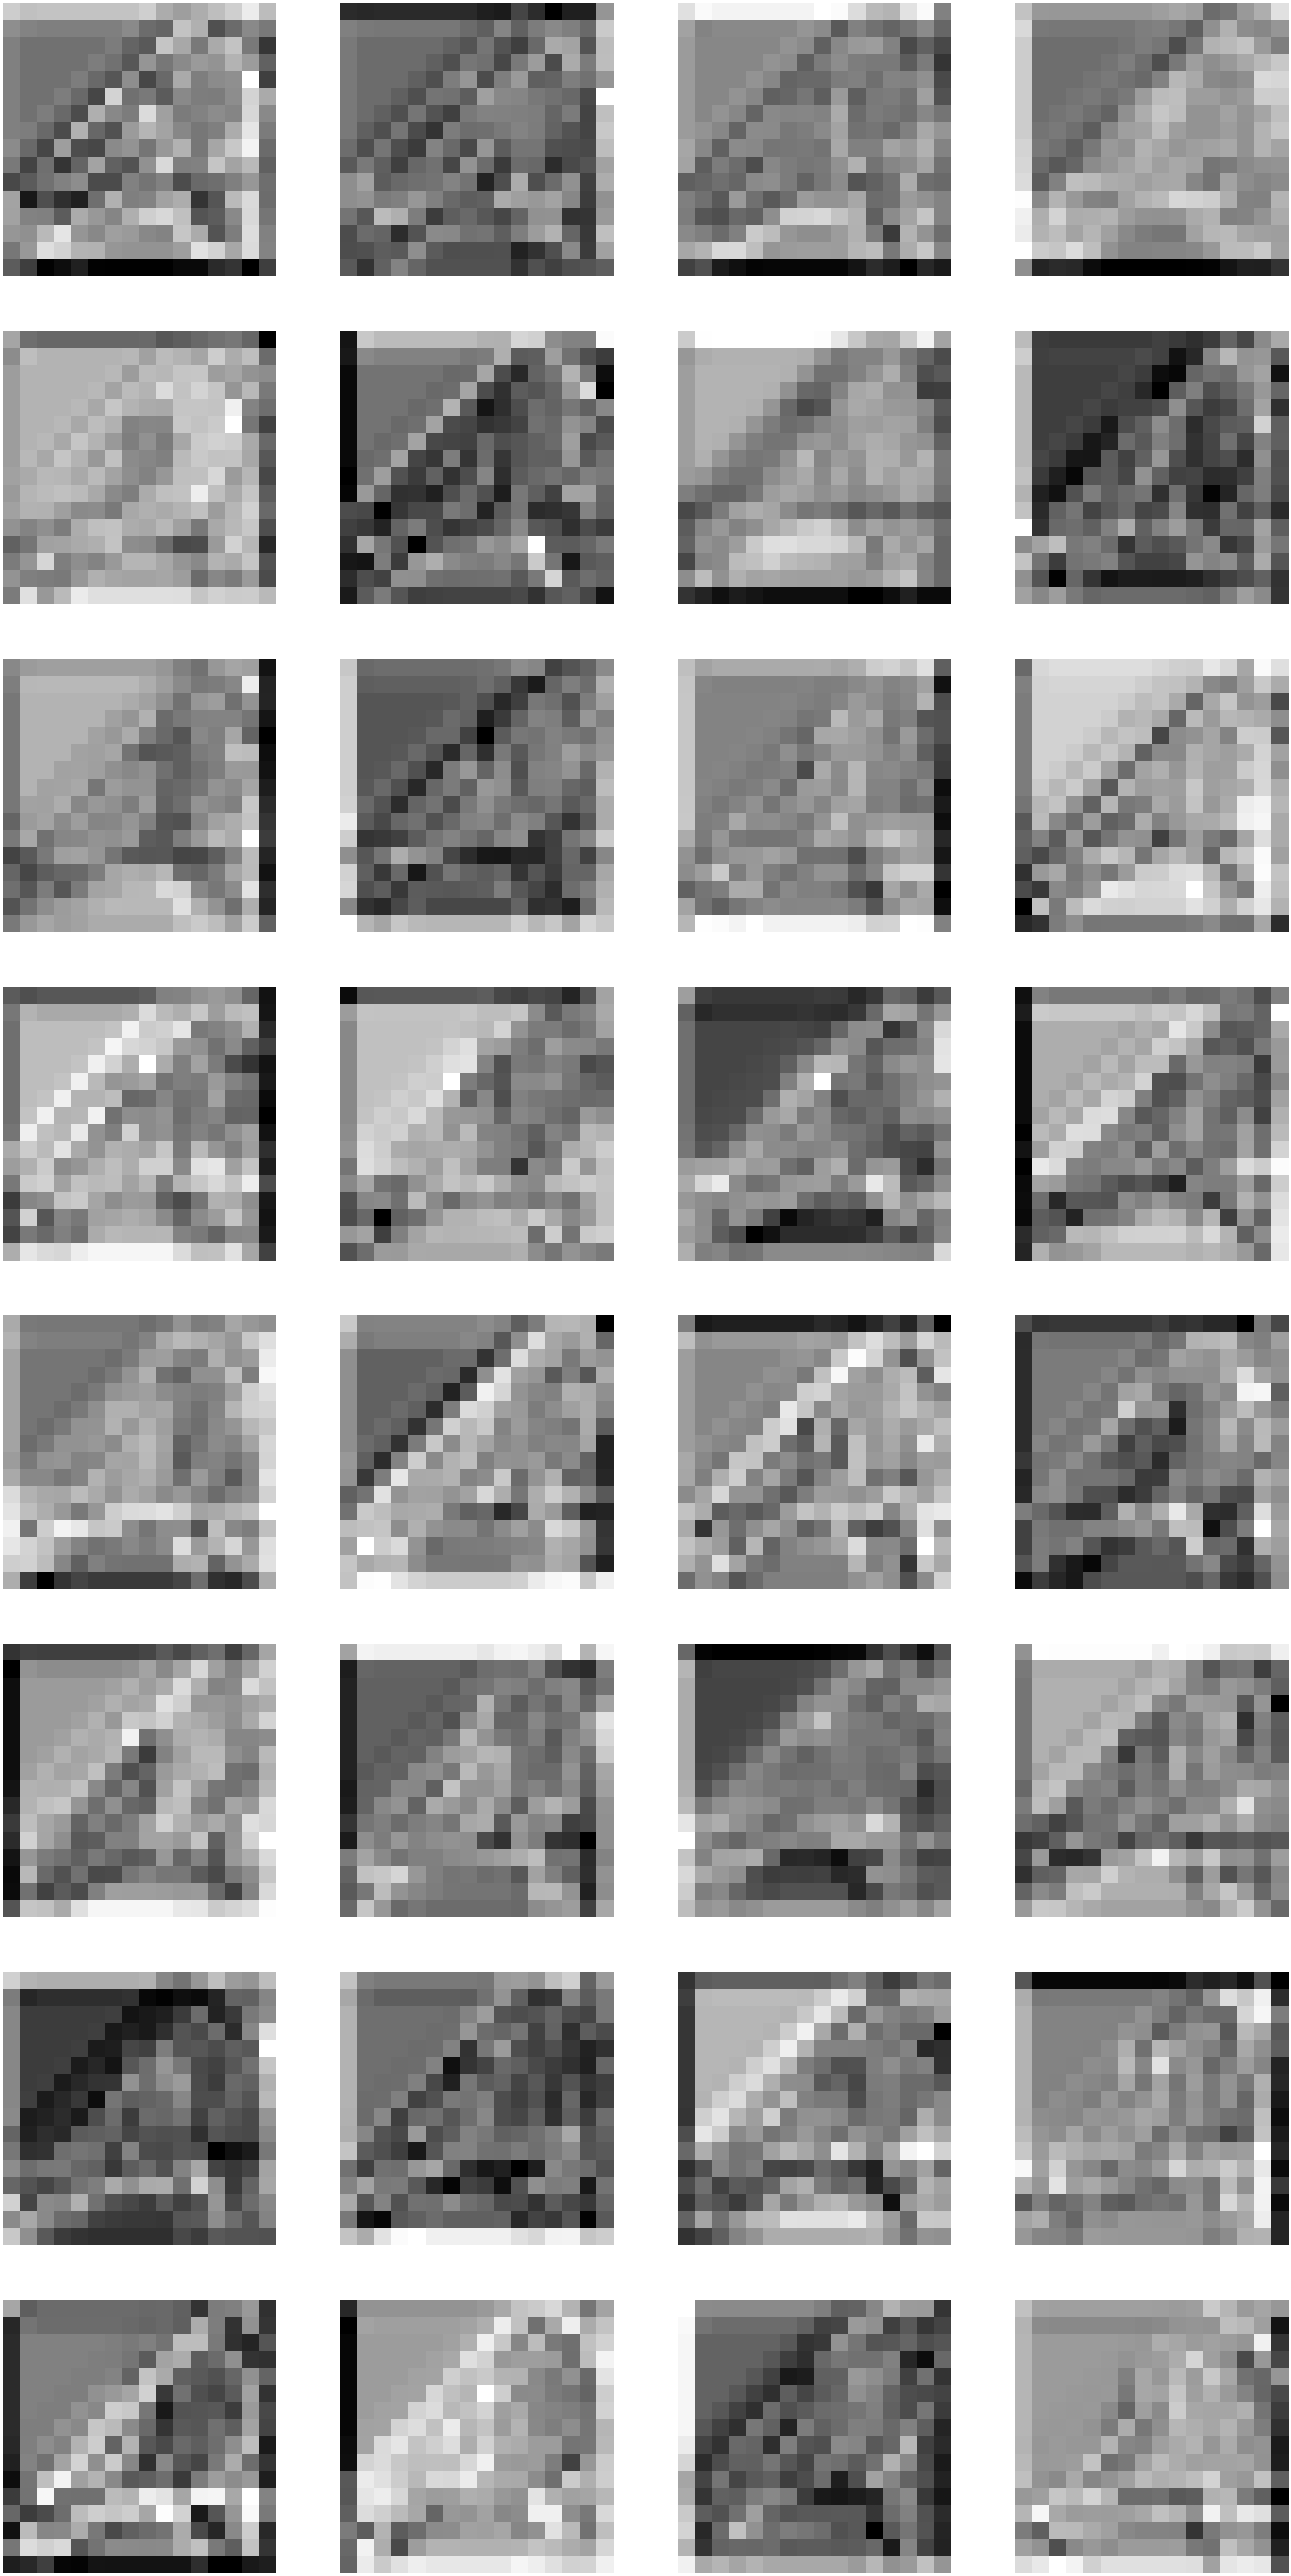

In [16]:
plot_tensors(cnn_out[1], title="Second Convolutional Layer Output")